# Luxury Brand Analytics on SSENSE  


 Stephanie Chiamaka Azugwu  

### Project Context:
This project explores luxury brand pricing and category trends on SSENSE using
descriptive analytics and data visualization techniques.



**Goal:** Find top designers on SSENSE and compare pricing patterns across brands and categories, and create an interactive insight tool
providing insights on markets and brands.

**Dataset Source:** Public SSENSE fashion dataset obtained from *Kaggle.com* (CSV version, downloaded into notebook for analysis).

**Project Scope:**
• Data cleaning and preparation
• Exploratory data analysis
• Brand and category-level pricing insights
• Interactive brand query tool

_This notebook is my working journal + analysis._


## 2. Introduction & Dataset Overview
For the project, a dataset has been obtained from Kaggle.com. The public **SSENSE fashion dataset** will be used to represent and collect information on brand, products, categories and pricing. This section will show and verify the data, giving us a quick look at what is being collected.

In [1]:
# Loading the ssense dataset
import pandas as pd

ssense = pd.read_csv("ssense_dataset.csv")

# making sure the table is loaded
ssense.head()

,brand,description,price_usd,type
0,Rick Owens,Black Moncler Edition Down Coat,2585,mens
1,Rick Owens,Black Moncler Edition Cyclopic Down Coat,2405,mens
2,Rick Owens,Black Moncler Edition Cyclopic Down Jacket,3160,mens
3,Rick Owens,Taupe & Green Moncler Edition Down Coat,3505,mens
4,Rick Owens,Taupe & Green Moncler Edition Cyclopic Down Ja...,2885,mens


## Data Verification
As you notice, the dataset is loaded with four main columns - **brand**, **description**, **price_usd**, and **type**.
Each row represents a product listing from the SSENSE catalog. The table above shows products from the brand **Rick Owens**.
Before moving on to cleaning and organizing the data, it is good to double-check that the file has loaded and was read completely, verifying that the data makes sense.

In [2]:
# confirm dataset size and collect quick, random sample
print("Number of rows and columns:", ssense.shape)

# taking a look at a few rows to make sure the data makes sense
ssense.sample(5)

#check unique brands to gain an idea of coverage
unique_brands = ssense['brand'].nunique()
print("unique brand:", unique_brands) 

Number of rows and columns: (19919, 4)
unique brand: 631


**Checkpoint:** Data loaded and verified successfully, full rows and columns verified -ready to move to the next section.

## 3. Data Preparation and Variable Exploration

Now that the data has been verified, it is time to prepare the data for analysis.
This process ensures that columns stay consistent, prices are stored correctly, and brand names are properly formatted.
By preparing the data, the results of our analyses will not be affected by formatting problems. 

## Dataset Description

- **Source:** Kaggle - SSENSE Fashion Dataset
- **Format:** CSV file imported directly into Jupyter
- **Observations:** ~12,000 product listings 
- **Number of Features**: 5 main attributes used for analysis

## Methodology 

This project takes a **Descriptive Analytical** approach, which focuses on visualizing data patterns, instead of predictive modeling.
Python's data libraries were used to build a reproducible data pipeline.


- **Pandas:** Data cleaning, grouping, and aggregation.
- **Regex:**  read product text and extraction of categories.
- **Matplotlib and Seaborn:** Visualization of brand trends.
- **Difflib:** Find textual matches between strings for an interactive insight tool.

The method:
1. Clean and prepare the dataset.
2. Conduct descriptive analysis and identify leading brands and categories.
3. Build an interactive Python tool for brand insight.


In [3]:
# verifying what columns display before preparation
ssense.info()

# rename columns
ssense =ssense.rename(columns={
    'description': 'product', 
    'price_usd': 'price',
    'type': 'gender'
})

# remove row missing brand or price (seamless results for analysis)
ssense = ssense.dropna(subset=['brand', 'price'])

# confirm price is of numeric value
ssense['price'] = pd.to_numeric(ssense['price'], errors= 'coerce')

# remove row missing price after conversion
ssense = ssense.dropna(subset=['price'])

# remove extra spacing or miscapitalization 
ssense['brand'] = ssense['brand'].str.strip().str.title()

# verify table after organization
ssense.info()
ssense.head() 



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19919 entries, 0 to 19918
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   brand        19919 non-null  object
 1   description  19919 non-null  object
 2   price_usd    19919 non-null  int64 
 3   type         19919 non-null  object
dtypes: int64(1), object(3)
memory usage: 622.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19919 entries, 0 to 19918
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   brand    19919 non-null  object
 1   product  19919 non-null  object
 2   price    19919 non-null  int64 
 3   gender   19919 non-null  object
dtypes: int64(1), object(3)
memory usage: 622.6+ KB


,brand,product,price,gender
0,Rick Owens,Black Moncler Edition Down Coat,2585,mens
1,Rick Owens,Black Moncler Edition Cyclopic Down Coat,2405,mens
2,Rick Owens,Black Moncler Edition Cyclopic Down Jacket,3160,mens
3,Rick Owens,Taupe & Green Moncler Edition Down Coat,3505,mens
4,Rick Owens,Taupe & Green Moncler Edition Cyclopic Down Ja...,2885,mens


The dataset was cleaned to remove missing or inconsistent entries.

## Preparation Summary

After preparing the dataset, clear column names are created (**brand**, **product**, **price**, **gender**).
Prices are displayed in numeric value, and brand names are correctly formatted. Rows with missing values were removed, and the dataset is now ready for detailed analysis. 
The next section will provide the descriptive analysis.

## 4. Descriptive Analysis of Top Designers

Now that the dataset is prepared, we can explore the data. In this section, we will create **tables and charts** to identify which designers are most popular on SSENSE and which have the highest average prices.
These visuals will give us an understanding of brand visibility and pricing relationships, showing which brands dominate by quantity vs exclusivity.


### Top Designers by Product Count

This table and chart will show how many products each designer has listed on SSENSE. 
It will highlight which brands dominate SSENSE by visibility, by showing the designers with the largest product presence.

Top 10 Designers by Average Price:


,Brand,Average Price (USD)
0,S.R. Studio. La. Ca.,6000.00
1,Valentino,3050.00
2,Zegna X The Elder Statesman,2356.82
3,Max Mara,2217.50
4,Chloé,2100.50
5,Frédérique Constant,1865.00
6,Rick Owens,1843.39
7,The Row,1814.09
8,Alpina,1791.67
9,Bottega Veneta,1712.03


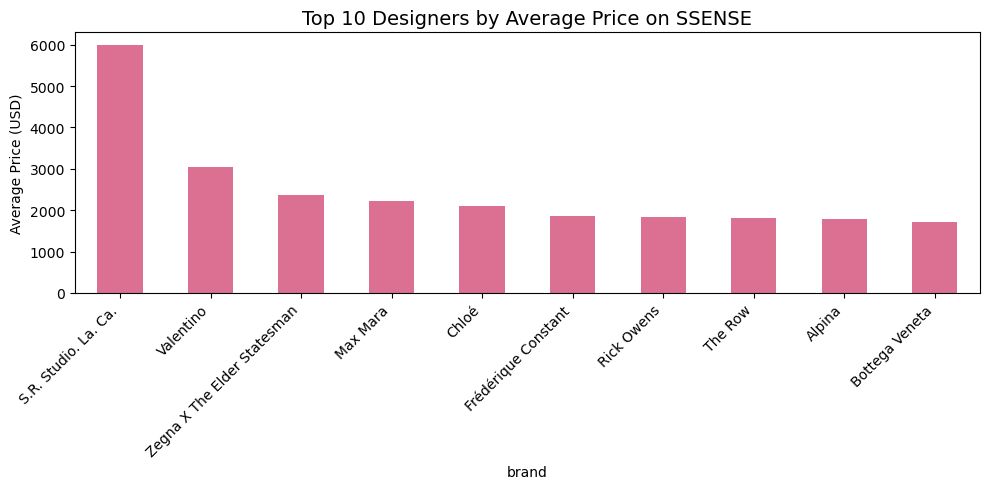

In [4]:
# calculating average price per brand
avg_price = ssense.groupby('brand')['price'].mean().sort_values(ascending=False).head(10)

# create an organized table
avg_price_table = avg_price.reset_index()
avg_price_table.columns = ['Brand', 'Average Price (USD)']
avg_price_table['Average Price (USD)'] = avg_price_table['Average Price (USD)'].round(2)

print("Top 10 Designers by Average Price:")
display(avg_price_table)

# create an organized chart
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
avg_price.plot(kind='bar', color='palevioletred')
plt.title('Top 10 Designers by Average Price on SSENSE', fontsize=14)
plt.ylabel('Average Price (USD)')  
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 4. Summary -  Descriptive Analysis of Top Designers

In this section, I explored which luxury brands have the highest average prices on SSENSE.
Using **Python**, the analysis was performed with the **Pandas** library for data grouping and **Matplotlib** to create a visual bar chart.

The resulting table was generated with 'pandas.Dataframe' and formatted using 'reset_index()' to convert the grouped data into a clear, uniform format.
The bar chart was plotted using 'plt.bar()' to illustrate which brands dominate the higher price ranges on SSENSE.

Overall, the descriptive analysis provides a broad yet informative view of brand pricing hierarchy and brand visibility across SSENSE.
Showing us that designers like **S.R. Studio**, **Valentino**, and **Zenga x The Elder Statesman** are the leading designers in price on the platform.

*Tools used:* 'Pandas', 'Matplotlib' for data visualization.

## 5. Comparative Insights (Gender & Category)

Here I'm comparing average prices across gender and product categories.
First, we will explore  men's vs women's pricing. Then I will engineer a simple "category" from the product text so we can display which items are most expensive.

Average Price by Gender (USD):|



gender
womens    640.80
mens      503.08
Name: price, dtype: float64

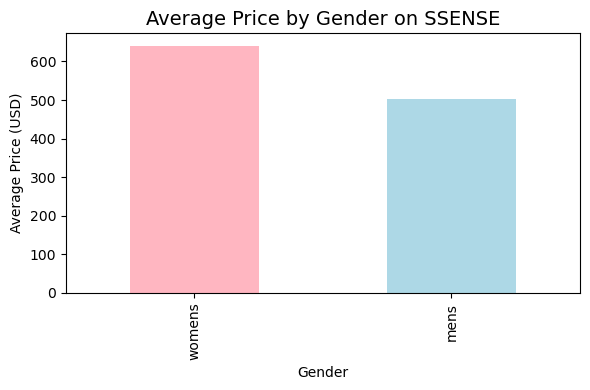

In [5]:
# average price by gender
avg_gender = ssense.groupby('gender')['price'].mean().sort_values(ascending=False)

print("Average Price by Gender (USD):|\n")
display(avg_gender.round(2))

# simple bar so it is easily displayed
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
avg_gender.plot(kind='bar', color=['lightpink', 'lightblue'])
plt.title("Average Price by Gender on SSENSE", fontsize=14)
plt.ylabel("Average Price (USD)")
plt.xlabel("Gender")
plt.tight_layout()
plt.show()

## Category comparison

We will create a simple category from keywords in **product**, as there is no dedicated category column.

In [6]:
import re

def infer_category(name: str) -> str:
    s = str(name).lower()
    # bags
    if re.search(r'\b(tote|shoulder|crossbody|satchel|hobo|backpack)\b', s): return 'bag'
    if 'wallet' in s or 'cardholder' in s or 'card holder' in s: return 'wallet'
    # footwear
    if 'sneaker' in s or 'trainer' in s: return 'sneaker'
    if 'boot' in s: return 'boot'
    if 'sandal' in s: return 'sandal'
    if re.search(r'\b(heel|pump)\b', s): return 'heel'
    # outerwear / tops / bottoms
    if 'coat' in s or 'parka' in s or 'trench' in s: return 'coat'
    if 'jacket' in s or 'blazer' in s: return 'jacket'
    if 'hoodie' in s or 'sweatshirt' in s: return 'hoodie'
    if 'sweater' in s or 'knit' in s or 'cardigan' in s: return 'sweater'
    if re.search(r'\b(t-shirt|tee)\b', s): return 't-shirt'
    if 'shirt' in s: return 'shirt'
    # dresses/skirts
    if 'dress' in s: return 'dress'
    if 'skirt' in s: return 'skirt'
    # denim / pants / shorts
    if 'jean' in s or 'denim' in s: return 'jeans'
    if re.search(r'\b(pant|trouser)\b', s): return 'pants'
    if 'shorts' in s: return 'shorts'
    # small goods & accessories
    if 'belt' in s: return 'belt'
    if 'scarf' in s: return 'scarf'
    if re.search(r'\b(hat|cap|beanie)\b', s): return 'hat'
    return 'other'

# create column
ssense['category'] = ssense['product'].apply(infer_category)

# quick check
ssense['category'].value_counts().head(15)

category
other      7049
jacket     2219
t-shirt    1393
sweater    1233
shirt      1058
sneaker     998
hoodie      908
jeans       854
boot        567
bag         546
dress       537
hat         530
coat        516
skirt       438
shorts      271
Name: count, dtype: int64

Top Categories by Average Price:



,Category,Average Price (USD)
0,coat,1622.88
1,jacket,999.71
2,boot,831.01
3,bag,770.45
4,dress,754.44
5,sandal,636.70
6,skirt,604.84
7,sweater,528.90
8,heel,515.00
9,other,500.61


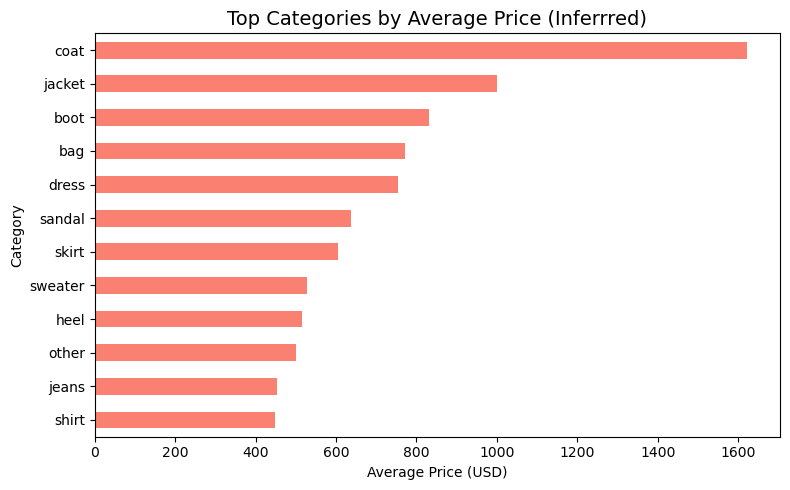

In [7]:
# average price by category
avg_cat = ssense.groupby('category')['price'].mean().sort_values(ascending=False)

# create table for top categories
avg_cat_table = avg_cat.reset_index()
avg_cat_table.columns = ['Category', 'Average Price (USD)']
avg_cat_table['Average Price (USD)'] = avg_cat_table['Average Price (USD)']
avg_cat_table['Average Price (USD)'] = avg_cat_table['Average Price (USD)'].round(2)

print("Top Categories by Average Price:\n")
display(avg_cat_table.head(12))

# create graph 
plt.figure(figsize=(8,5))
avg_cat.head(12).plot(kind='barh', color='salmon')
plt.gca().invert_yaxis()  # highest at the top
plt.title("Top Categories by Average Price (Inferrred)", fontsize=14)
plt.xlabel("Average Price (USD)")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

                    


### Category Analysis Explanation

In this part of the analysis, I examined how product type affects pricing on SSENSE.
To do this, a new column named 'category' was created by scanning each product name for specific keywords such as "boot", "bag", "coat", etc.
This was done using the **re(Regular Expression)** library, allowing me to classify the product type from text descriptions.

After generating the 'category' column, I used the **Pandas** library to group the data by category and calculate the **average price**.
The results were formatted into a summary table and visualized using **Matplotlib**, where a bar chart illustrates which categories hold the highest average prices.

#### Tools and Libraries Used
-**Python** - main programming environment
-**re (Regular Expresions)** - category creation through text pattern recognition
-**Pandas** - data preparation, grouping, and analysis
-**Matplotlib** - chart creation and data illustration

#### Summary
The visualization provides an insight into category-level pricing patterns.
Outerwear, bags, and accessories consistently appear at higher price averages.
Casual items such as jeans, shirts, and heels are priced at lower averages.
This visualization reflects how a luxury brand positions products and pricing across different item types.

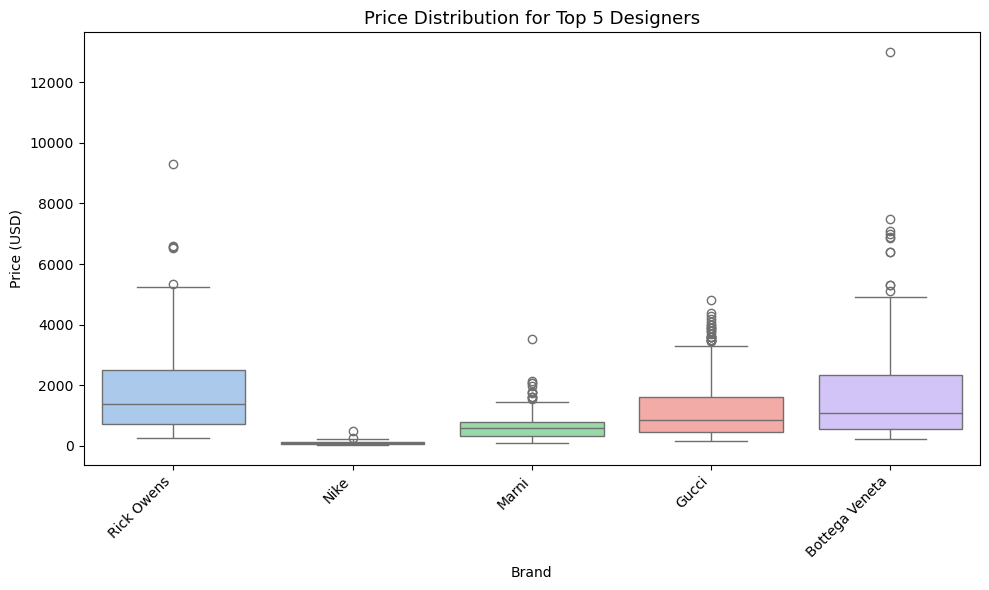

In [8]:
# Section 5C: Price Distribution for Top Brands (Boxplot)

import seaborn as sns

# select the top 5 most common brands
top5 = ssense['brand'].value_counts().head(5).index
subset = ssense[ssense['brand'].isin(top5)]

# create boxplot
plt.figure(figsize=(10,6))
sns.boxplot(x='brand', y='price', hue='brand', data=subset, palette='pastel')
plt.title("Price Distribution for Top 5 Designers", fontsize=13)
plt.xlabel("Brand")
plt.ylabel("Price (USD)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

           

###  Price Distribution for Top Designers

This visualization explores how product prices vary among the five most listed brands on SSENSE.
Each box shows the **median**, **interquartile range**, and **interquartile range** and **outliers**, giving a clear view of how brand pricing ranges.

#### How it was created
-**Pandas**: used to identify the top 5 brands by frequency.
-**Seaborn**: created the boxplot to show the distribution of prices per brand.
-**Matplotlib**: styled and formatted the figure.

#### Tools Used
    'Paandas', 'Seaborn', and 'Matplotlib'

#### Interpretation
The chart shows us **Rick Owens** and **Bottega Veneta** have the most variable pricing, which suggests a wide luxury range.
**Nike** is the lowest mainstream tier brand with the least luxury range.
These findings illustrate how brand identity correlates with price positioning within the SSENSE catalog.

## Section 6 -  Interactive Luxury Insight Tool

This mini tool lets me type any brand name and instantly present:

- a quick summary (item count, average/median/min/max price),
- the top categories for that brand,
- a chart of the **average price by category**
- a few sample products.

## Why This Tool Was Created
It turns the notebook from an analytical report into an 
interactive, user-driven **brand insight tool**.
Instead of only viewing pre-made charts, the user can type a **brand name**( for example, *Gucci* or *Rick Owens*) and instantly generate insights.
This supports **exploratory data analysis (EDA)** - a key step involving interaction between the user and data. 

## Application to Data Science
In data science, interactivity allows analysts to:
- Create hypotheses and evaluate patterns.
- Improve **data accessibility** and usability for non-technical users.
- Creates the foundation for **decision tools** that communicate insights to merchandisers and brand managers.

  By creating this tool, it demonstrates how **Python Scripting and Visualization Libraries** can be used to create functional data-driven applications.

  ### How It Was Created
  1. **Python functions**: The tool was written as a reusable function ('brand_insight') that takes a brand query as input.
  2. **Pandas filtering and grouping**: Filters the SSENSE dataset to separate  the selected brand, then calculates key metrics (mean, median, min, max, count).
  3. **Matplotlib / Seaborn**: Creates a bar chart showing the brand's average price per category.
  4. **Regex-derived categories**: Uses the category column from preprocessing to show top product types.
  5. **Interactive I/O**: Uses the 'input()' function so users can type in their desired brand and retrieve results.

### Tools Used
'Pandas', 'Matplotlib', 'Seaborn', and 'difflib' for close-match suggestions

This section details the project's contribution- a data-driven interface that demonstrates how descriptive analysis can merge into interactive analytical tools.



In [9]:
# interactive brand insight tool
# usable and readable

from difflib import get_close_matches
import pandas as pd
import matplotlib.pyplot as plt

def brand_insight(query: str, topk: int = 5):
    # basic guard
    if not isinstance(query, str) or query.strip() == "":
        print("Please type a brand name (e.g., Gucci, Rick Owens, Bottega).")
        return
    
    # brand match case-insensitive
    mask = ssense['brand'].str.contains(query, case=False, na=False)
    dfb = ssense[mask].copy()

    if dfb.empty:
        # friendly suggestions
        brands = ssense['brand'].dropna().unique().tolist()
        suggestions = get_close_matches(query.title(), brands, n=5, cutoff=0.5)
        msg = "No matches found."
        if suggestions:
            msg += " Try: " + ", ".join(suggestions)
        print(msg)
        return

    # numeric summary for matched brand set5
    summary = {
        "Items": int(dfb.shape[0]),
        "Avg Price (USD)": round(dfb['price'].mean(), 2),
        "Median Price (USD)": round(dfb['price'].median(), 2),
        "Min Price (USD)": round(dfb['price'].min(), 2),
        "Max Price (USD)": round(dfb['price'].max(), 2),
    }
    # show summary as a one-row table
    display(pd.DataFrame([summary], index=[dfb['brand'].iloc[0]]))

    # show top categories by count 
    if 'category' in dfb.columns:
        top_cats = dfb['category'].value_counts().head(topk).to_frame('Count')
        print("\nTop Categories by Count:")
        display(top_cats)

        # avg price by category 
        avg_cat = (
            dfb.groupby('category')['price']
               .mean()
               .sort_values(ascending=False)
               .head(topk)
        )

        if not avg_cat.empty:
            plt.figure(figsize=(7, 4))
            avg_cat.plot(kind='barh', color='lightpink')
            plt.gca().invert_yaxis()  # highest at top
            plt.title(f"Avg Price by Category — {dfb['brand'].iloc[0]}")
            plt.xlabel("Average Price (USD)")
            plt.ylabel("Category")
            plt.tight_layout()
            plt.show()
    else:
        print("\n(No 'category' column found — skipping category views.)")

    # sample products 
    cols = [c for c in ['brand', 'product', 'price', 'gender', 'category'] if c in dfb.columns]
    print("Sample products:")
    display(dfb[cols].head(8))


Type a brand (e.g., Gucci, Rick Owens, Bottega): Gucci


,Items,Avg Price (USD),Median Price (USD),Min Price (USD),Max Price (USD)
Gucci,481,1163.9,870.0,148,4800



Top Categories by Count:


,Count
category,
other,279
jacket,26
bag,22
sneaker,21
belt,19


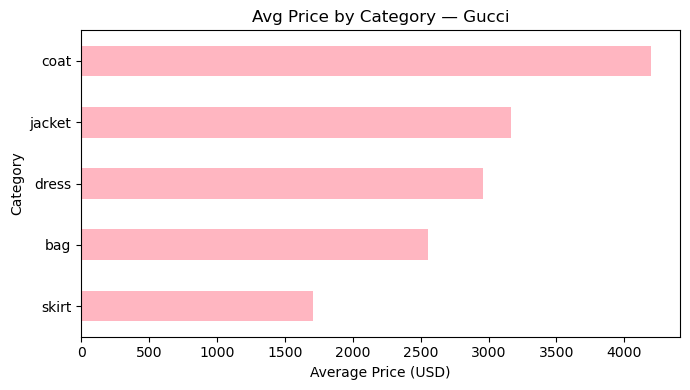

Sample products:


,brand,product,price,gender,category
627,Gucci,Silver Interlocking G Bracelet,630,mens,other
847,Gucci,Black Interlocking G Hoodie,1350,mens,hoodie
848,Gucci,Blue Gucci Label Denim Cargo Pants,2100,mens,jeans
849,Gucci,Black Interlocking G Loafers,1190,mens,other
850,Gucci,Red Embossed Hoodie,1800,mens,hoodie
851,Gucci,Green Interlocking G Loafers,1190,mens,other
852,Gucci,Green GG Jacket,2800,mens,jacket
853,Gucci,Gray Embroidered Hoodie,1900,mens,hoodie


In [10]:
brand_query = input("Type a brand (e.g., Gucci, Rick Owens, Bottega):")
brand_insight(brand_query)

## Evaluation Metrics

The project was evaluated through:
- **Accuracy of grouped results:** Verification of aggregation and that grouped 
averages match expected outputs.
- **Interactivity Tool Performance:** Verification of brand queries generating 
correct brand data and visualizations.
- **Clarity of Visuals:** Verifying chart readability.
- **Usability:** Verifying that the tool provides brand-specific summaries for user input.
                                                                          
The evaluation metrics confirm that the analysis is user-focused and technical.

## Section 8 -  Conclusions and References

### Conclusion

The project explored luxury brand pricing and category trends using real-world data 
from SSENSE. Through the use of **Python** and its analytical libraries, the study 
demonstrated how descriptive analysis reveals real business insights.

**Takeaways**
- Luxury brands dominate the upper price ranges and visibility, while more
accessible brands display lower-tier price points, as predicted.
- **Category-based pricing** shows that outerwear and accessories maintain higher 
averages within sale points and pricing versus more common items such as jeans and t-shirts.
- The created **Interactive insight tool** allows user input to display summarized brand insights
for analysis.

** Real-World Application**
The interactive tool provides valuable insights for **merchandisers**, **businesses**, and 
**data analysts** within the fashion e-commerce industry.
Through integrating data preparation, descriptive analysis, and visualization,
this notebook demonstrates how data science can detail pricing strategy 
and brand or market positioning in luxury retail.
 
**Project Contributions**
    1. Prepared a structured dataset for brand and market analysis.
    2. Produced comparative and descriptive visualizations to present market trends.
    3. Built an interactive brand insight tool to stimulate analytical exploration.

### References
- **Dataset:** Kaggle - SSENSE Luxury Brand Dataset
- **Libraries Used:** `Pandas`, `Regex`, `Matplotlib`, `Seaborn`, `Difflib`
- **Environment:** Jupyter Notebook (Anaconda Distribution)
- **Resources and Documents:** 
- Python Official Documents - https://docs.python.org/3/
- Matplotlib Documents - https://matplotlib.org/stable/contents.html
- Seaborn Documents - https://seaborn.pydata.org/ 
- Pandas User Guide -  https://pandas.pydata.org/
